# CLIMADA 

## Exposure 

In [1]:
from climada.entity import LitPop

In [4]:
exp = LitPop()
exp.set_country('HTI')

/Users/ckropf/Documents/Climada/climada_python/climada/entity/exposures/base.py:218: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']
/Users/ckropf/Documents/Climada/climada_python/climada/entity/exposures/base.py:218: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  self.gdf.crs = self.meta['crs']
/Users/ckropf/Documents/Climada/climada_python/climada/entity/exposures/base.py:722: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  exp.gdf = GeoDataFrame(
/Users/ckropf/opt/anaconda3/envs/climada_210/lib/python3.8/site-packages/geopandas/geodataframe.py:167: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attri

<GeoAxesSubplot:title={'center':'LitPop for Haiti at 30 as, year=2016, financial mode=pc, GPW-\nyear=2015, BM-year=2016, exp=[1, 1]'}>

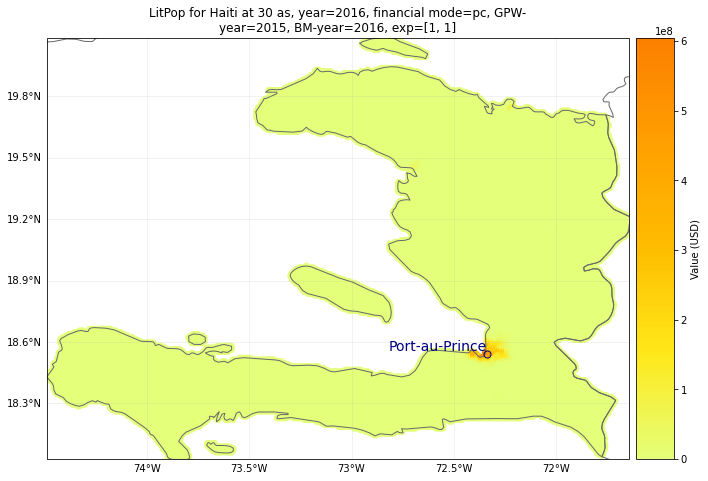

In [5]:
exp.plot_scatter()

In [6]:
exp.gdf

,value,latitude,longitude,region_id,if_
0,0.000000,18.429167,-74.487500,332,1
1,5.401910,18.437500,-74.479167,332,1
2,6022.411224,18.429167,-74.479167,332,1
3,377.766415,18.420833,-74.479167,332,1
4,111.222626,18.454167,-74.470833,332,1
...,...,...,...,...,...
33193,10943.183731,19.179167,-71.645833,332,1
33194,10968.656466,19.170833,-71.645833,332,1
33195,12041.040781,19.162500,-71.645833,332,1
33196,11930.195536,19.154167,-71.645833,332,1


## Hazard 

In [28]:
exp.gdf.rename(columns={'if_':'if_TC'}, inplace=True)

In [11]:
from climada.hazard import TCTracks

In [14]:
tc_tracks = TCTracks()

In [15]:
tc_tracks.read_ibtracs_netcdf(basin='NA', year_range=(2000, 2020))

In [16]:
tc_tracks.data

[<xarray.Dataset>
 Dimensions:                 (time: 7)
 Coordinates:
   * time                    (time) datetime64[ns] 2000-06-07T18:00:00 ... 200...
     lat                     (time) float32 21.0 20.97 20.9 20.79 20.7 20.72 20.8
     lon                     (time) float32 -93.0 -92.85 -92.8 ... -93.3 -93.5
 Data variables:
     time_step               (time) float64 3.0 3.0 3.0 3.0 3.0 3.0 3.0
     radius_max_wind         (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0
     radius_oci              (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 0.0
     max_sustained_wind      (time) float32 25.0 25.0 25.0 25.0 25.0 25.0 25.0
     central_pressure        (time) float32 1.008e+03 1.008e+03 ... 1.01e+03
     environmental_pressure  (time) float64 1.01e+03 1.01e+03 ... 1.01e+03
 Attributes:
     max_sustained_wind_unit:  kn
     central_pressure_unit:    mb
     name:                     NOT_NAMED
     sid:                      2000160N21267
     orig_event_flag:          True
     data_provider:

In [17]:
tc_tracks = tc_tracks.tracks_in_exp(exp, 0.1)

/Users/ckropf/Documents/Climada/climada_python/climada/hazard/tc_tracks.py:279: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  exp_buffer = exposure.gdf.buffer(distance=buffer, resolution=0)
/Users/ckropf/Documents/Climada/climada_python/climada/hazard/tc_tracks.py:282: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tc_tracks_lines = self.to_geodataframe().buffer(distance=buffer)


<GeoAxesSubplot:>

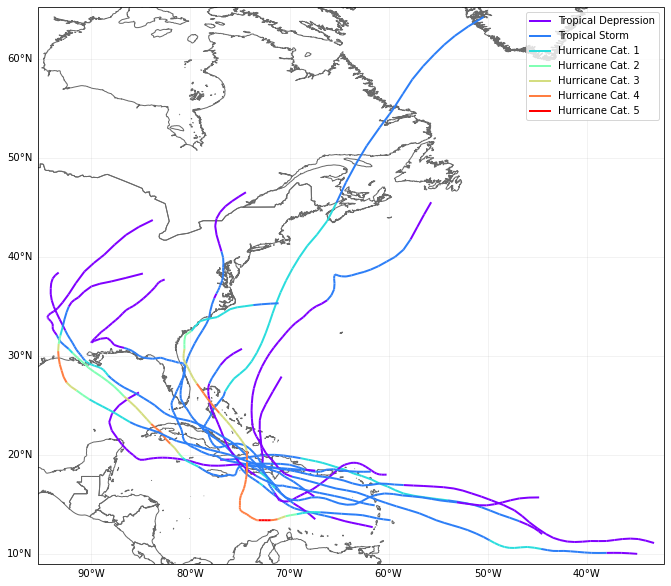

In [18]:
tc_tracks.plot()

In [19]:
tc_tracks.equal_timestep(5)
tc_tracks.calc_perturbed_trajectories(nb_synth_tracks=1)

<GeoAxesSubplot:>

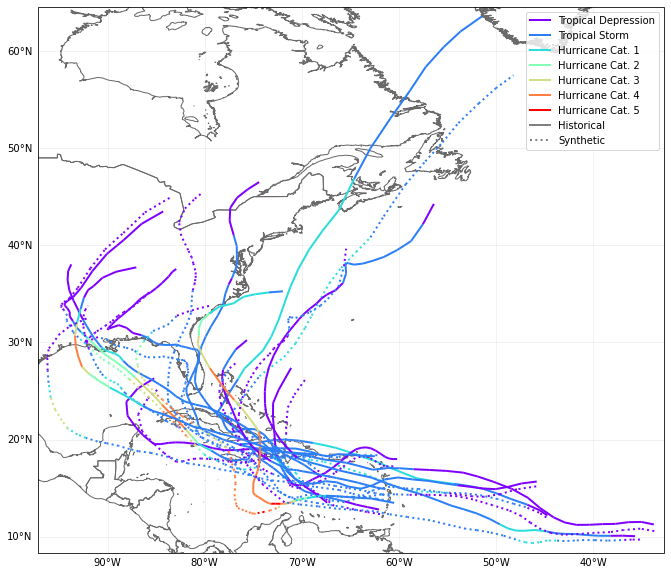

In [20]:
tc_tracks.plot()

In [22]:
from climada.hazard import TropCyclone, Centroids

In [23]:
cent = Centroids()
cent = cent.from_geodataframe(exp.gdf)

<GeoAxesSubplot:>

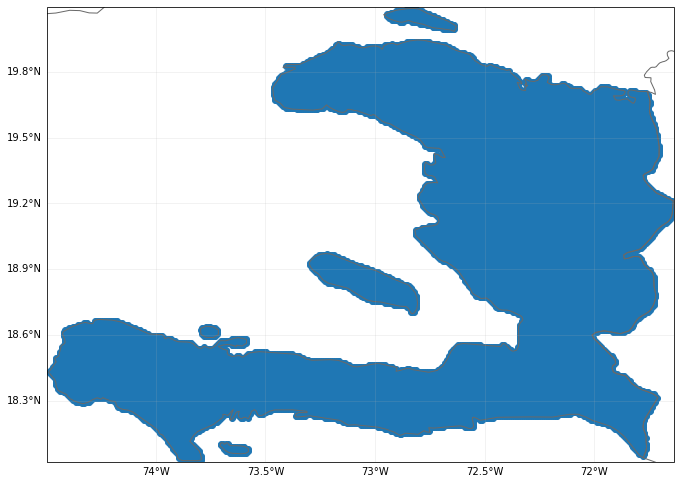

In [24]:
cent.plot()

In [25]:
tc = TropCyclone()
tc.set_from_tracks(tc_tracks, cent)

<GeoAxesSubplot:title={'center':'TC max intensity at each point'}>

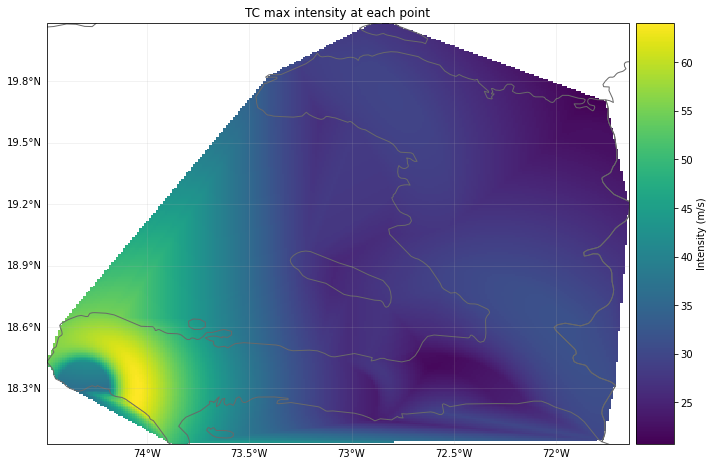

In [26]:
tc.plot_intensity(0)

In [27]:
tc.frequency

array([0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952, 0.02380952,
       0.02380952, 0.02380952, 0.02380952, 0.02380952])

## Impact function 

In [29]:
from climada.entity import IFTropCyclone

In [30]:
impf = IFTropCyclone()
impf.set_emanuel_usa()

<AxesSubplot:title={'center':'TC 1: Emanuel 2011'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

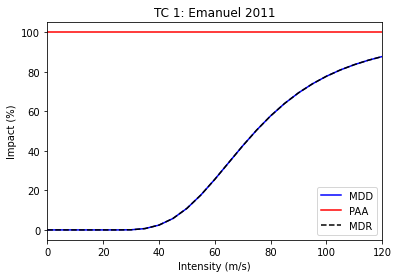

In [31]:
impf.plot()

In [32]:
from climada.entity import ImpactFuncSet

In [33]:
impf_set = ImpactFuncSet()
impf_set.append(impf)

## Impact 

In [34]:
from climada.engine import Impact

In [35]:
imp = Impact()

In [37]:
imp.calc(exp, impf_set, tc)

<GeoAxesSubplot:title={'center':'Expected annual impact'}>

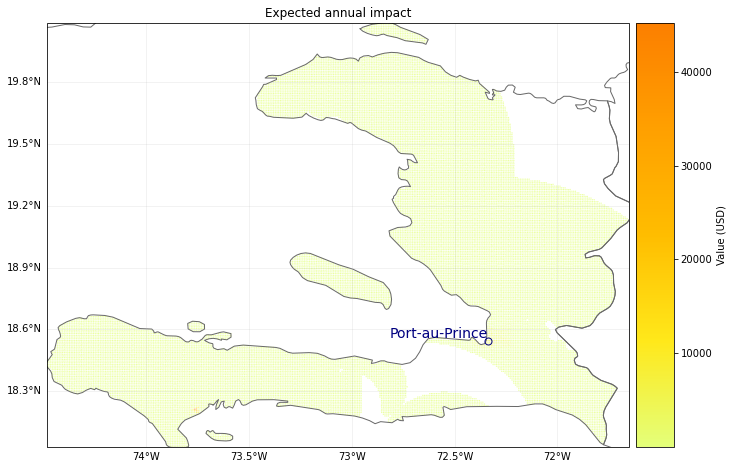

In [38]:
imp.plot_hexbin_eai_exposure()

In [39]:
imp.aai_agg

1210215.9002234677

In [40]:
imp.at_event

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.17618587e+04, 1.06746882e+02, 0.00000000e+00, 0.00000000e+00,
       2.23991032e+07, 2.79059237e+04, 2.83497026e+07, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.87529266e+02, 0.00000000e+00])

## Adapatation 

In [41]:
from climada.entity import Measure, MeasureSet
import copy
import numpy as np

In [42]:
meas_set = MeasureSet()
impf_meas_set = ImpactFuncSet()

impf_set_meas = ImpactFuncSet()
impf_meas = copy.copy(impf)
impf_meas.name = 'building fit'
impf_meas.id = 2
select = impf_meas.intensity > 35
impf_meas.mdd = impf_meas.mdd * select
impf_meas.paa = impf_meas.paa * select
impf_meas_set.append(impf_meas)
impf_meas_set.append(impf)

meas = Measure()
meas.haz_type = 'TC'
meas.name = 'building_code'
meas.cost = 0.001 * exp.gdf.value.sum()
exp_meas = copy.deepcopy(exp)
exp_meas.gdf.if_TC = 2
meas.exposures_set = exp_meas
meas_set.append(meas)

<AxesSubplot:title={'center':'TC 2: building fit'}, xlabel='Intensity (m/s)', ylabel='Impact (%)'>

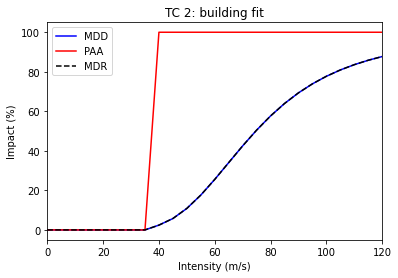

In [43]:
impf_meas.plot()

In [44]:
from climada.engine import CostBenefit

In [45]:
from climada.entity import Entity, DiscRates

In [51]:
discount = 0.02
disc_rate = DiscRates()
disc_rate.years = np.arange(2016, 2100)
disc_rate.rates = np.ones(disc_rate.years.size) * discount

ent = Entity()
ent.exposures = exp
ent.impact_funcs = impf_meas_set
ent.measures = meas_set
ent.disc_rates = disc_rate

In [52]:
cb = CostBenefit()

In [53]:
cb.calc(tc, ent)


Measure          Cost (USD k)    Benefit (USD k)    Benefit/Cost
-------------  --------------  -----------------  --------------
building_code         47372.6            541.845       0.0114379

--------------------  -------  -------
Total climate risk:   1210.22  (USD k)
Average annual risk:  1210.22  (USD k)
Residual risk:         668.37  (USD k)
--------------------  -------  -------
Net Present Values


<AxesSubplot:xlabel='NPV averted damage over 1 years (USD m)', ylabel='Benefit/Cost ratio'>

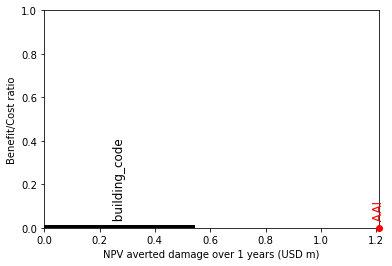

In [55]:
cb.plot_cost_benefit()